In [131]:
#1
import numpy as np

a = np.random.random((10,3))
print(a)
print ((a[np.arange(a.shape[0]), np.array(np.argmin(abs(a - 0.5), axis=1))]).reshape(10,1))


[[0.42719466 0.25313484 0.86336564]
 [0.37740811 0.15079868 0.95957584]
 [0.46065585 0.81552677 0.7793168 ]
 [0.45769123 0.35734837 0.62180082]
 [0.83043599 0.66234835 0.98596889]
 [0.03524268 0.66643219 0.57669628]
 [0.99598211 0.91328468 0.25977387]
 [0.0970335  0.26970706 0.80178893]
 [0.19999482 0.87658307 0.52154054]
 [0.96449288 0.06951747 0.30700409]]
[[0.42719466]
 [0.37740811]
 [0.46065585]
 [0.45769123]
 [0.66234835]
 [0.57669628]
 [0.25977387]
 [0.26970706]
 [0.52154054]
 [0.30700409]]


In [129]:
#2
a = np.random.random((6,6))
print(a)
print ((np.array(np.sum(a, axis = 1)/np.amin(a, axis = 0)).reshape(6, 1)))


[[0.85308965 0.40930798 0.68970883 0.95703714 0.52374851 0.98131613]
 [0.36559534 0.16353548 0.80343311 0.07897842 0.8351666  0.15687609]
 [0.72134897 0.74052424 0.31147391 0.00914755 0.54767732 0.96967708]
 [0.82298489 0.23091466 0.675335   0.01635809 0.68541776 0.32230972]
 [0.84698766 0.09506621 0.09069407 0.09173193 0.94863139 0.92735544]
 [0.30284511 0.33592773 0.38372199 0.4592343  0.57533603 0.28389977]]
[[ 14.5757951 ]
 [ 25.28327383]
 [ 36.38439539]
 [300.98979369]
 [  5.72883098]
 [ 14.9223821 ]]


In [125]:
#3
x = np.array([6,2,1,3,0,0,5,7,0])
print( max(filter(lambda a: (a[1] and not a[0]), zip(x, x[1:])), key=lambda a: a[1])[1])

5


In [126]:
#4
x = np.ones(10)
i = np.array([0,1,2,3,5,5,5,8])
print( x + np.bincount(i, minlength=len(x)))

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [132]:
#5
a = np.arange(16).reshape(4,4)
b = [list(a.diagonal(3-i)) for i in range (len(a)*2 - 1)]
print (dict(zip(np.linspace(0, len(a)*2 - 1, len(a)*2).astype(int), b)))

{0: [3], 1: [2, 7], 2: [1, 6, 11], 3: [0, 5, 10, 15], 4: [4, 9, 14], 5: [8, 13], 6: [12]}


Введите число точек : 1000
Кластеризация завершилась после 16 итераций
Отклонение :  4.5432620041308785e-06


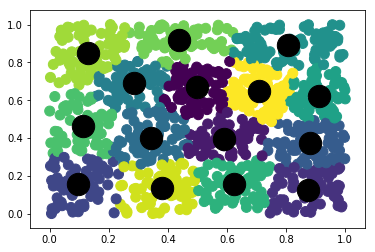

In [136]:
#6
import matplotlib.pyplot as plt


def kmeans(data, k, itr, thresh):
    centers = data[:k]
    for i in range(itr):
        labels = np.argmin(np.linalg.norm(data - centers[:, None], axis=2), axis=0)
        new_centers = np.array([data[labels==j, :].mean(axis=0) for j in range(k)])
        d = ((new_centers - centers)**2).sum()
        if (d <= thresh) or (new_centers == centers).all():
            break
        else:
            centers = new_centers
    else:
        raise RuntimeError("Кластеризация не завершена после", itr,"итераций")
    print("Кластеризация завершилась после", i, "итераций")
    return(centers, d, labels)

n = int(input("Введите число точек : "))
k = 15
data = np.random.rand(n,2)
centers, d, labels = kmeans(data, k, 100, 1e-05) 

%matplotlib inline
plt.scatter(x=data[:, 0], y=data[:, 1], s=100, c=labels)
print("Отклонение : ",d)
plt.scatter(x=centers[:, 0], y=centers[:, 1], s=500, c='k')
plt.show()